# Librerias

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
sns.set()

# Cargar el dataframe (Dirección del archivo)

In [4]:
df = pd.read_csv('/home/medina/Desktop/6 class csv.csv')

In [5]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Sobre el dataset

From Kaggle: https://www.kaggle.com/datasets/deepu1109/star-dataset

This CSV file contains a dataset of 240 stars of 6 classes:

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Información del dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Reenombrar columnas

In [7]:
df.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitude', 
              'star_type', 'star_color', 'spectral_class']

In [8]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Análisis exploratorio

## Temperatura

The unit of temperature used in the data for this quantity is the Kelvin (K) scale.

### Average, median and mode

In [9]:
pd.DataFrame({'Average': df['temperature'].mean(),
              'Median': df['temperature'].median(),
              'Mode': df['temperature'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,10497.4625,5776.0,3600


### Variance and standard deviation

In [10]:
pd.DataFrame({'Variance': df['temperature'].var(),
              'Standard deviation': df['temperature'].std()},
             index= ['Values'])

,Variance,Standard deviation
Values,9.124882e+07,9552.425037


### Quartiles

In [11]:
pd.DataFrame(df['temperature'].describe()[['25%', '50%', '75%']])

,temperature
25%,3344.25
50%,5776.00
75%,15055.50


### Histogram

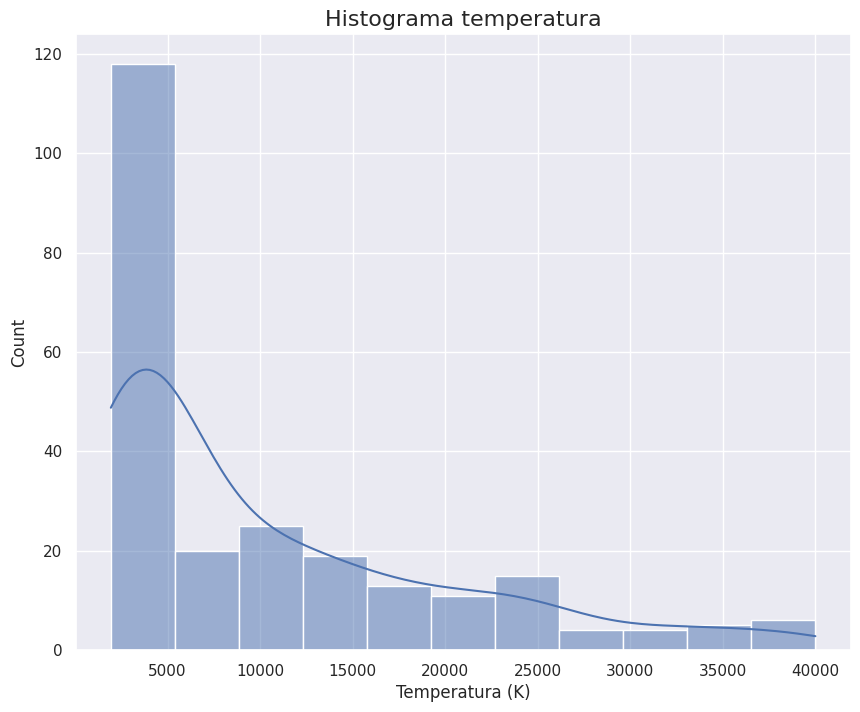

In [12]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', kde= True)
ax.set_title("Histograma temperatura", fontsize= 16)
plt.xlabel('Temperatura (K)')
plt.show()

## Luminosidad

### Average, median and mode

In [13]:
pd.DataFrame({'Average': df['luminosity'].mean(),
              'Median': df['luminosity'].median(),
              'Mode': df['luminosity'].mode()[0]}, 
             index= ['Values'])

,Average,Median,Mode
Values,107188.361635,0.0705,200000.0


### Variance and standard deviation

In [14]:
pd.DataFrame({'Variance': df['luminosity'].var(),
              'Standard deviation': df['luminosity'].std()},
             index= ['Values'])

,Variance,Standard deviation
Values,3.219593e+10,179432.24494


### Quartiles

In [15]:
pd.DataFrame(df['luminosity'].describe()[['25%', '50%', '75%']])

,luminosity
25%,0.000865
50%,0.070500
75%,198050.000000


### Histogram

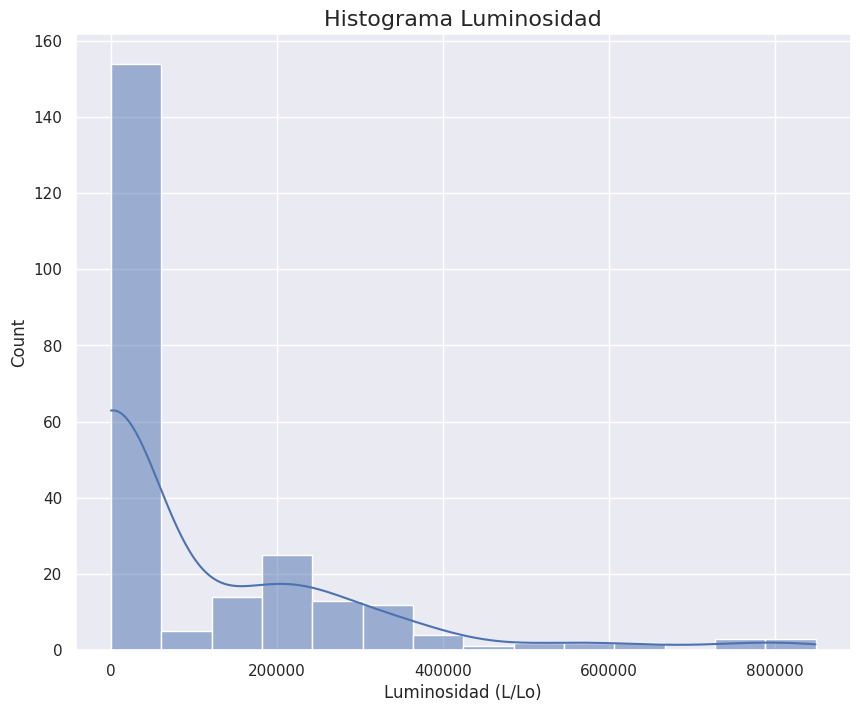

In [16]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', kde= True)
ax.set_title("Histograma Luminosidad", fontsize= 16)
plt.xlabel('Luminosidad (L/Lo)')
plt.show()

## Radio

The data present in the radius variable are determined in relation to the solar radius.

### Average, median and mode

In [17]:
pd.DataFrame({'Average': df['radius'].mean(),
              'Median': df['radius'].median(),
              'Mode': [df['radius'].mode().values]},
             index= ['Values'])

,Average,Median,Mode
Values,237.157781,0.7625,"[0.11, 0.24, 36.0, 1324.0]"


### Variance and standard deviation

These data show that the data consists of type 4 and 5 stars. That is, supergiants and hypergiants. It is expected that these stars will indeed have greater luminosity.

In [18]:
pd.DataFrame({'Variance': df['radius'].var(),
              'Standard deviation': df['radius'].std()},
             index= ['Values'])

,Variance,Standard deviation
Values,267450.083621,517.155763


### Quartiles

In [19]:
pd.DataFrame(df['radius'].describe()[['25%', '50%', '75%']])

,radius
25%,0.10275
50%,0.76250
75%,42.75000


### Histogram

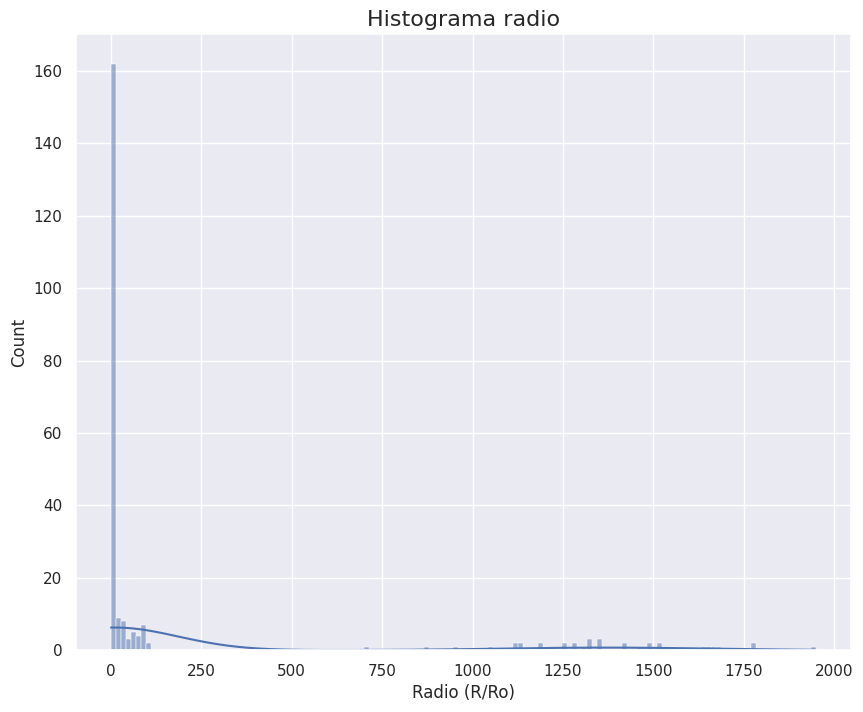

In [20]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', kde= True)
ax.set_title("Histograma radio", fontsize= 16)
plt.xlabel('Radio (R/Ro)')
plt.show()

## Magnitud absoluta

It consists of the absolute visual magnitude (Mv) of the stars.

### Average, median and mode

In [21]:
pd.DataFrame({'Average': df['absolute_magnitude'].mean(),
              'Median': df['absolute_magnitude'].median(),
              'Mode': df['absolute_magnitude'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,4.382396,8.313,12.23


### Variance and standard deviation

In [22]:
pd.DataFrame({'Variance': df['absolute_magnitude'].var(),
              'Standard deviation': df['absolute_magnitude'].std()},
             index= ['Values'])

,Variance,Standard deviation
Values,110.933816,10.532512


### Histogram

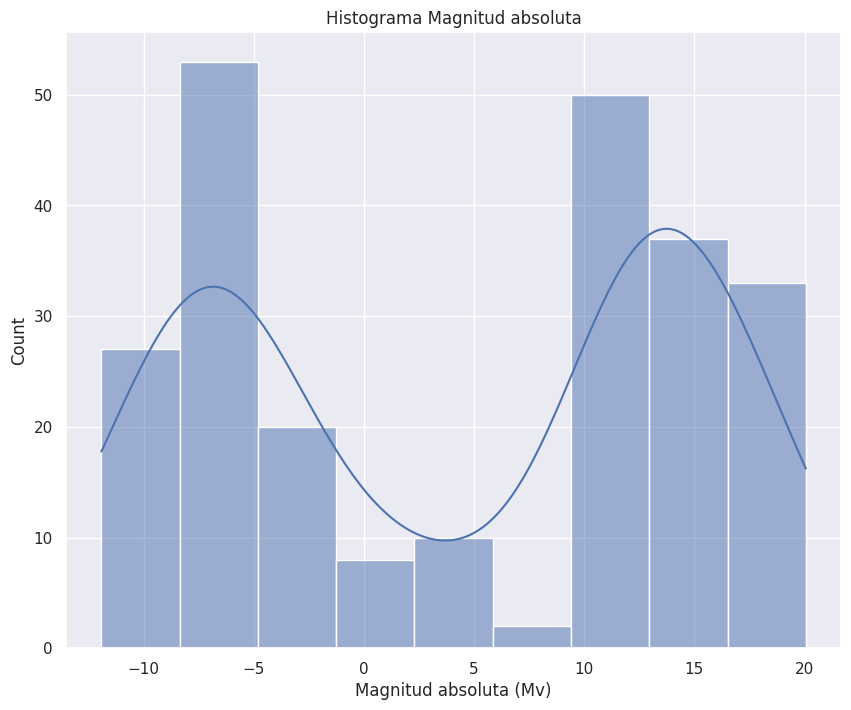

In [23]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', kde= True)
ax.set_title("Histograma Magnitud absoluta")
plt.xlabel('Magnitud absoluta (Mv)')
plt.show()

## Color estrella

It contains the star's colors after spectral analysis.

The types are:

In [24]:
df['star_color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [25]:
df.replace('Blue ', 'Blue', inplace= True)

In [26]:
df.replace('white', 'White', inplace= True)

In [27]:
df.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)

In [28]:
df.replace('yellowish', 'Yellowish', inplace= True)

In [29]:
df.replace('yellow-white', 'Yellow-White', inplace= True)

After processing the column data, it is observed that:

In [30]:
df['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'Yellow-White', 'Orange',
       'White-Yellow', 'Yellowish', 'Orange-Red'], dtype=object)

### Conteo Color de estrellas

In [31]:
count_star_color = pd.DataFrame({'Count': df['star_color'].value_counts(ascending= True)})

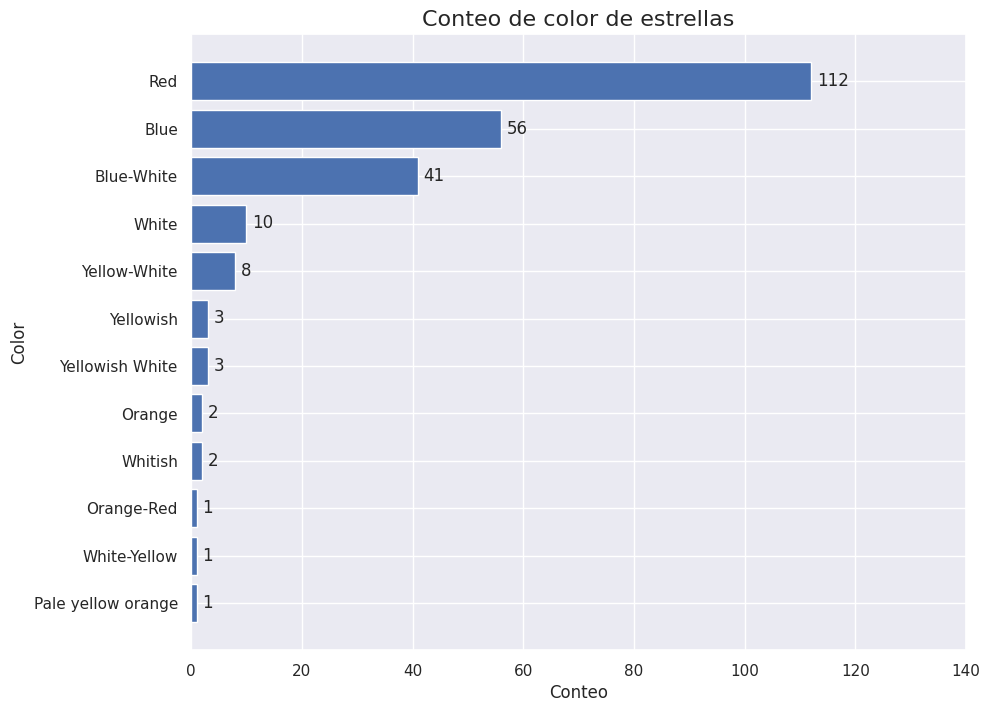

In [32]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_star_color.index, count_star_color['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 1, index - 0.1, bar.get_width())

plt.title('Conteo de color de estrellas', fontsize= 16)
plt.xlabel('Conteo')
plt.ylabel('Color')
plt.xlim([0, 140])
plt.show()

### Comportamiento de variables

#### Temperatura

##### Histograms:

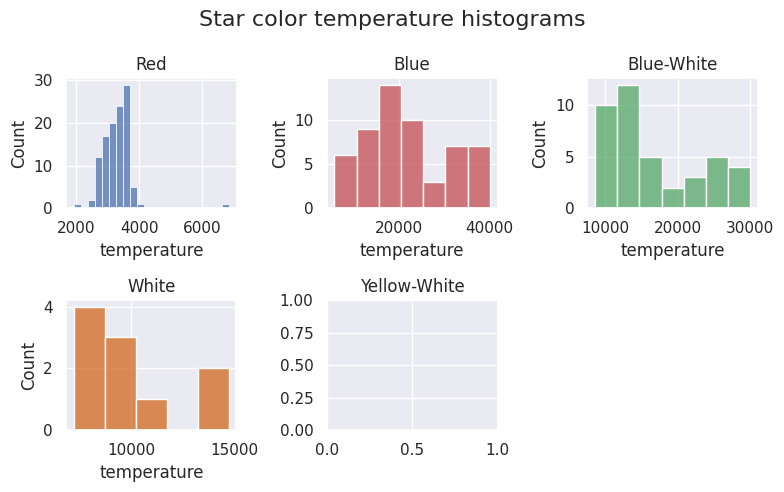

In [33]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star color temperature histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'temperature', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'temperature', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'temperature', color= 'g', ax= ax[0, 2])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('star_color == "White"'), x= 'temperature', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('White')
ax5 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'temperature', color= 'teal', ax= ax[1, 1])
ax5.set_title('Yellow-White')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

#### Luminosidad

##### Histograms:

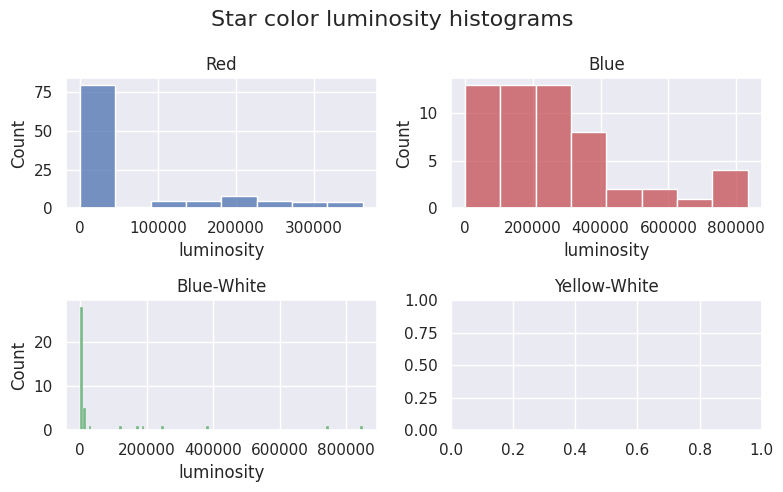

In [34]:
fig, ax = plt.subplots(2, 2, figsize= (8, 5))
fig.suptitle('Star color luminosity histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'luminosity', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'luminosity', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'luminosity', color= 'g', ax= ax[1, 0])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'luminosity', color= 'teal', ax= ax[1, 1])
ax4.set_title('Yellow-White')
plt.tight_layout()
plt.show()

#### Radio

##### Histograms:

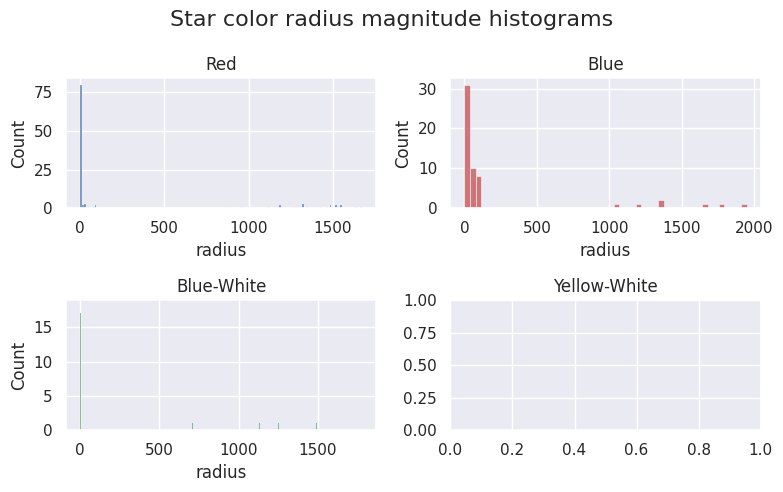

In [35]:
fig, ax = plt.subplots(2, 2, figsize= (8, 5))
fig.suptitle('Star color radius magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'radius', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'radius', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'radius', color= 'g', ax= ax[1, 0])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'radius', color= 'teal', ax= ax[1, 1])
ax4.set_title('Yellow-White')
# fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

#### Magnitud absoluta

##### Histograms:

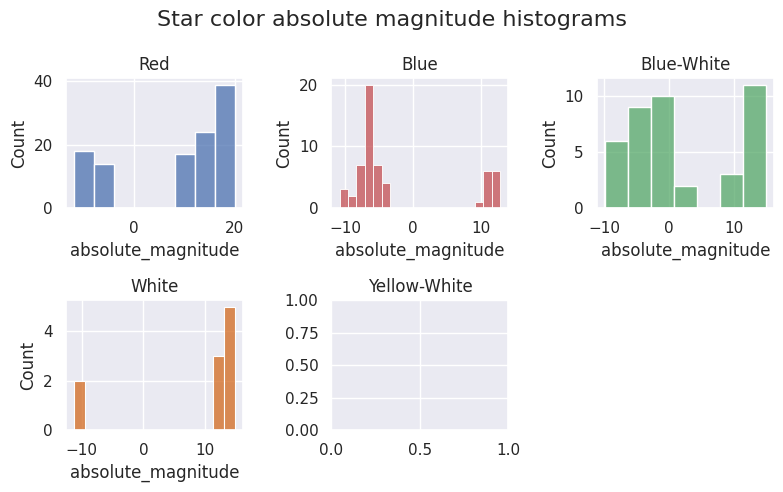

In [36]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star color absolute magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_color == "Red"'), x= 'absolute_magnitude', ax= ax[0, 0])
ax1.set_title('Red')
ax2 = sns.histplot(data= df.query('star_color == "Blue"'), x= 'absolute_magnitude', color= 'r', ax= ax[0, 1])
ax2.set_title('Blue')
ax3 = sns.histplot(data= df.query('star_color == "Blue-White"'), x= 'absolute_magnitude', color= 'g', ax= ax[0, 2])
ax3.set_title('Blue-White')
ax4 = sns.histplot(data= df.query('star_color == "White"'), x= 'absolute_magnitude', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('White')
ax5 = sns.histplot(data= df.query('spectral_class == "Yellow-White"'), x= 'absolute_magnitude', color= 'teal', ax= ax[1, 1])
ax5.set_title('Yellow-White')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

## Clase espectral

The types are:

In [37]:
df['spectral_class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [38]:
count_spectral_class = pd.DataFrame({'Count': df['spectral_class'].value_counts(ascending= True)})

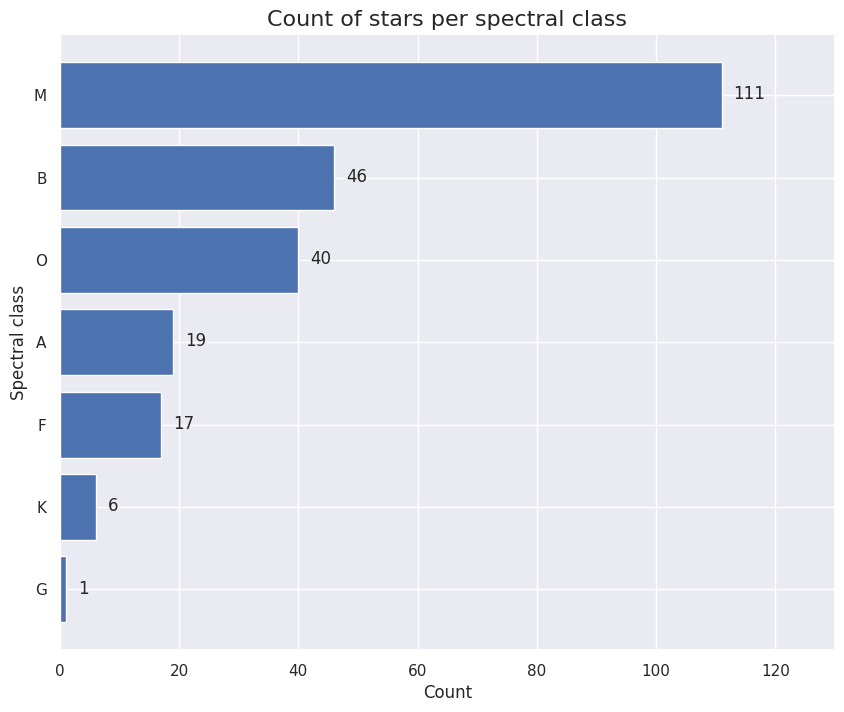

In [39]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_spectral_class.index, count_spectral_class['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 2, index - 0.05, bar.get_width())

plt.title('Count of stars per spectral class', fontsize= 16)
plt.xlabel('Count')
plt.ylabel('Spectral class')
plt.xlim([0, 130])
plt.show()

### Temperatura

##### Histograms:

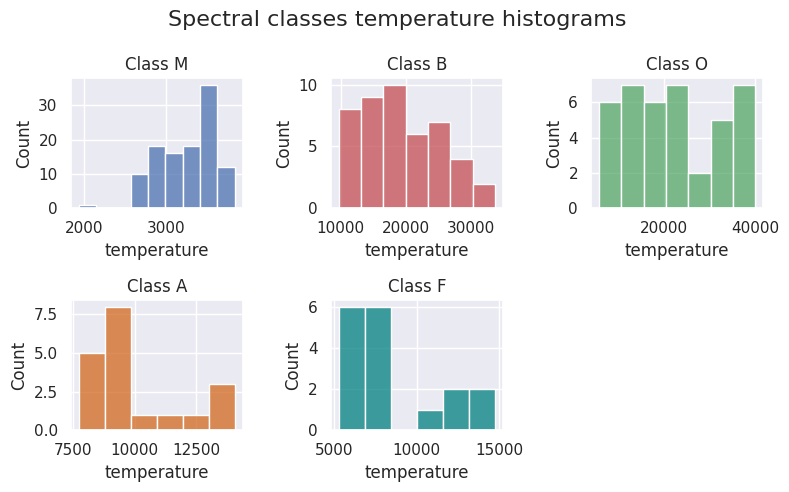

In [40]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes temperature histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'temperature', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'temperature', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'temperature', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'temperature', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'temperature', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

#### Luminosidad

##### Histograms:

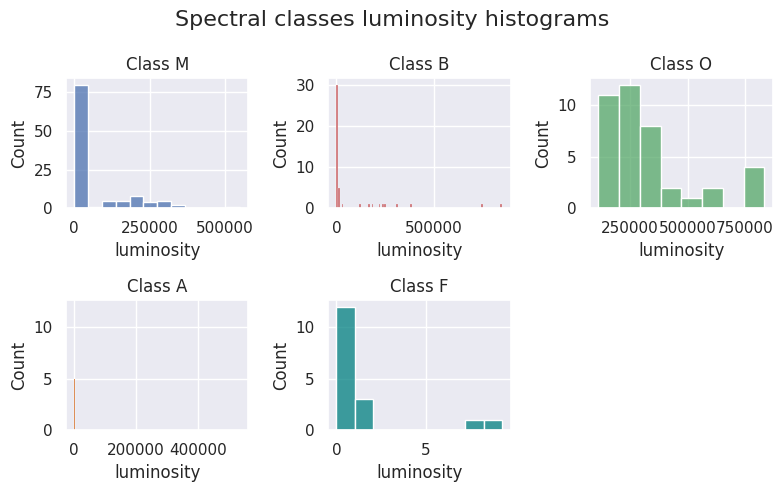

In [41]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes luminosity histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'luminosity', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'luminosity', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'luminosity', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'luminosity', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'luminosity', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

#### Radio

##### Histogram:

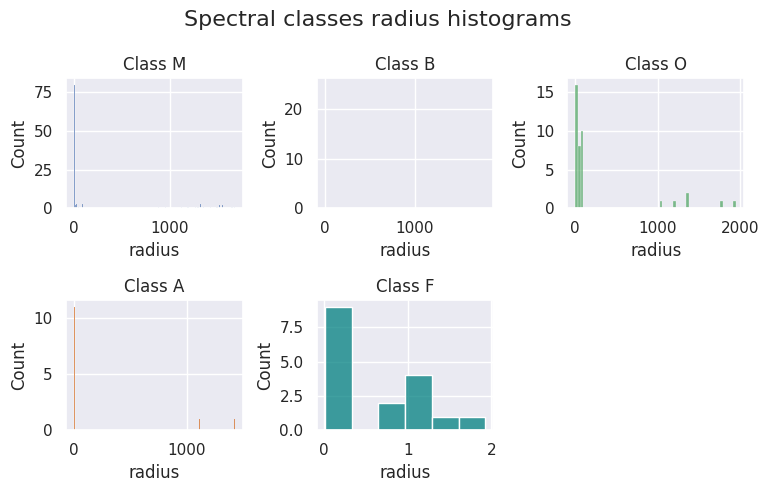

In [42]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes radius histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'radius', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'radius', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'radius', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'radius', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'radius', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

#### Magnitud absoluta

##### Histogram:

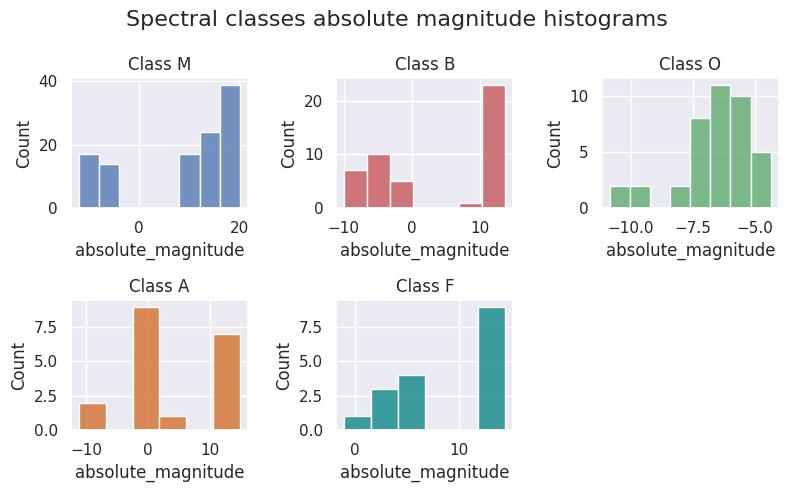

In [43]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Spectral classes absolute magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('spectral_class == "M"'), x= 'absolute_magnitude', ax= ax[0, 0])
ax1.set_title('Class M')
ax2 = sns.histplot(data= df.query('spectral_class == "B"'), x= 'absolute_magnitude', color= 'r', ax= ax[0, 1])
ax2.set_title('Class B')
ax3 = sns.histplot(data= df.query('spectral_class == "O"'), x= 'absolute_magnitude', color= 'g', ax= ax[0, 2])
ax3.set_title('Class O')
ax4 = sns.histplot(data= df.query('spectral_class == "A"'), x= 'absolute_magnitude', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Class A')
ax5 = sns.histplot(data= df.query('spectral_class == "F"'), x= 'absolute_magnitude', color= 'teal', ax= ax[1, 1])
ax5.set_title('Class F')
fig.delaxes(ax[1, 2])
plt.tight_layout()
plt.show()

## Tipo de estrella

The types are:

In [44]:
df['star_type'].unique()

array([0, 1, 2, 3, 4, 5])

### Count

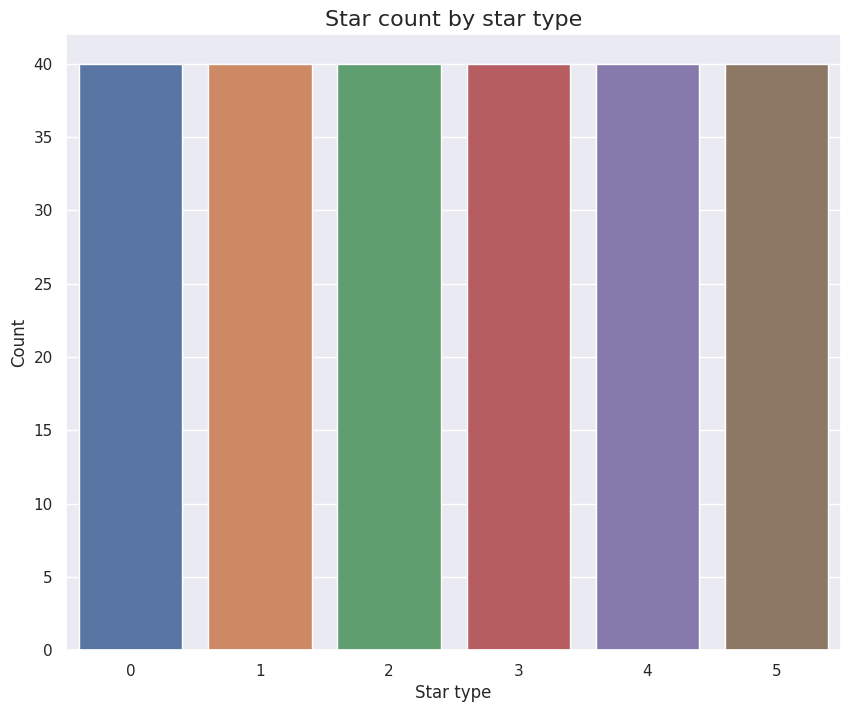

In [45]:
plt.figure(figsize= (10, 8))
ax = sns.countplot(data= df, x= 'star_type', orient= 'horizontal')
ax.set_title('Star count by star type', fontsize= 16)
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

### Crosstabs

#### `star_type` and `star_color`

In [46]:
type_color = pd.crosstab(df['star_type'], df['star_color'])

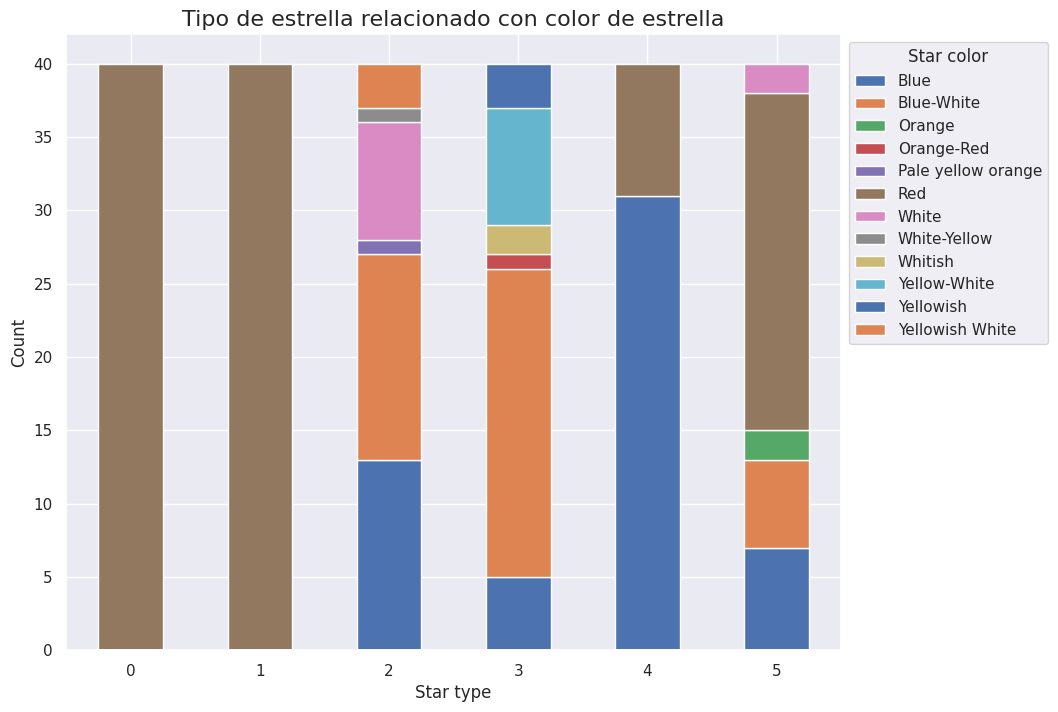

In [47]:
ax = type_color.plot(kind= 'bar', stacked= True, rot= 0, figsize= (10, 8))
ax.set_title('Tipo de estrella relacionado con color de estrella', fontsize= 16)
ax.legend(title= 'Star color', bbox_to_anchor= (1, 1))
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

##### Histograma:

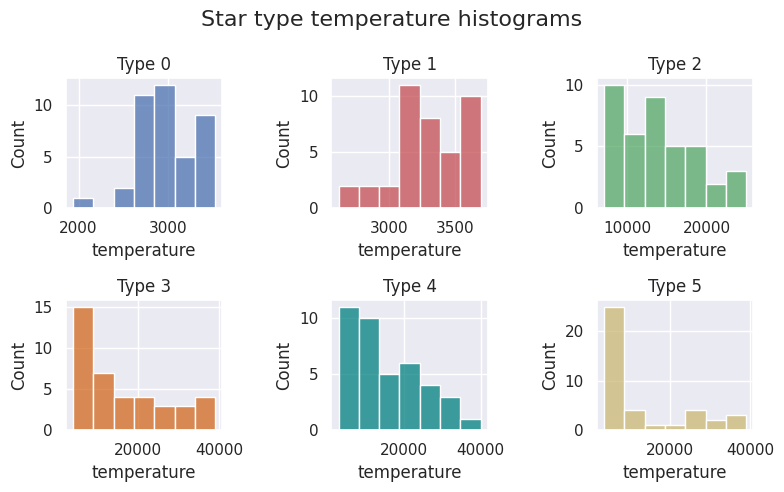

In [48]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type temperature histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'temperature', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'temperature', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'temperature', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'temperature', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'temperature', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'temperature', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

##### Histograma:

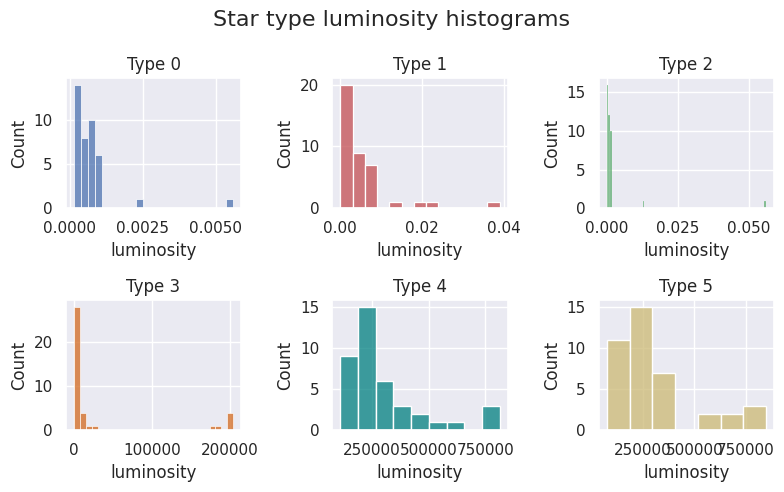

In [49]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type luminosity histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'luminosity', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'luminosity', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'luminosity', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'luminosity', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'luminosity', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'luminosity', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

#### Histograma

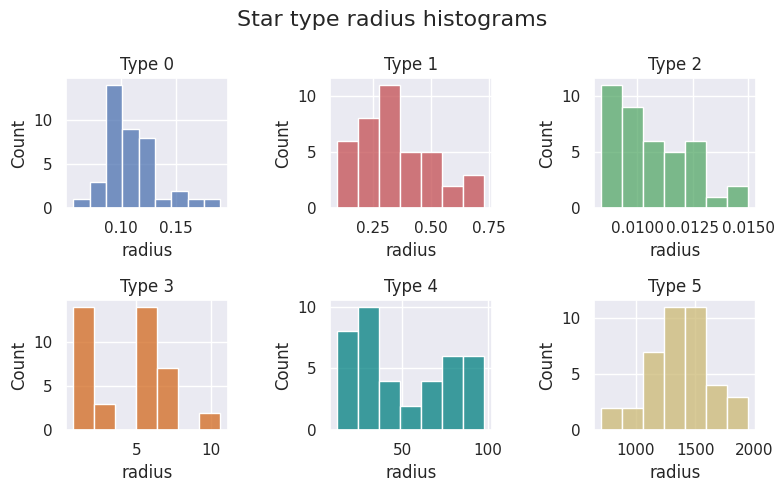

In [50]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type radius histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'radius', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'radius', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'radius', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'radius', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'radius', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'radius', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

##### Histograma:

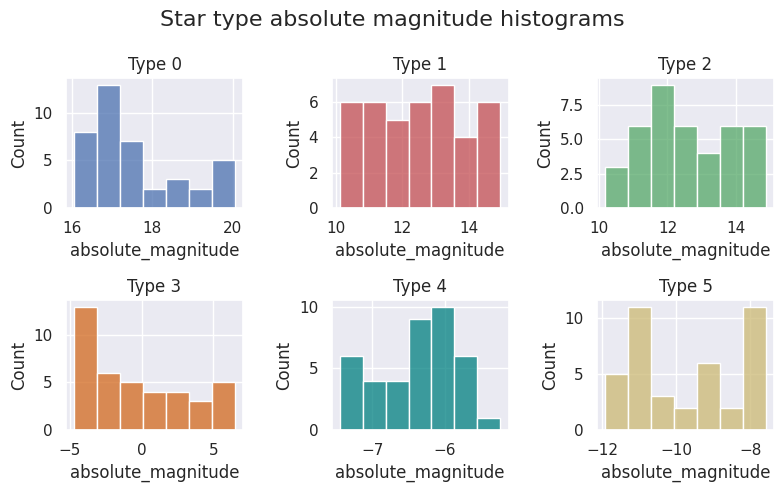

In [51]:
fig, ax = plt.subplots(2, 3, figsize= (8, 5))
fig.suptitle('Star type absolute magnitude histograms', fontsize= 16)
ax1 = sns.histplot(data= df.query('star_type == 0'), x= 'absolute_magnitude', ax= ax[0, 0])
ax1.set_title('Type 0')
ax2 = sns.histplot(data= df.query('star_type == 1'), x= 'absolute_magnitude', color= 'r', ax= ax[0, 1])
ax2.set_title('Type 1')
ax3 = sns.histplot(data= df.query('star_type == 2'), x= 'absolute_magnitude', color= 'g', ax= ax[0, 2])
ax3.set_title('Type 2')
ax4 = sns.histplot(data= df.query('star_type == 3'), x= 'absolute_magnitude', color= 'chocolate', ax= ax[1, 0])
ax4.set_title('Type 3')
ax5 = sns.histplot(data= df.query('star_type == 4'), x= 'absolute_magnitude', color= 'teal', ax= ax[1, 1])
ax5.set_title('Type 4')
ax6 = sns.histplot(data= df.query('star_type == 5'), x= 'absolute_magnitude', color= 'y', ax= ax[1, 2])
ax6.set_title('Type 5')
plt.tight_layout()
plt.show()

## Pairplot

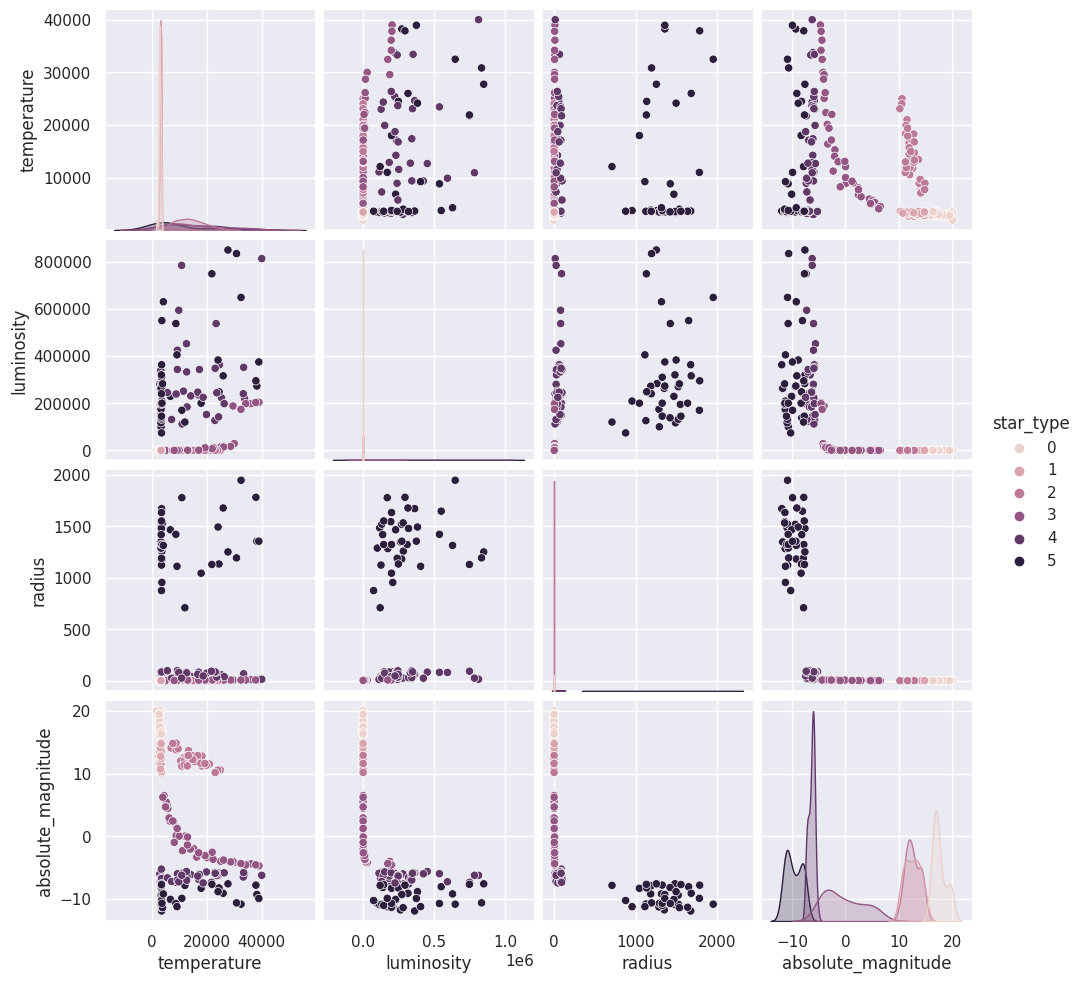

In [52]:
sns.pairplot(data= df, hue= 'star_type')
plt.show()

# Analisis de coorelación

In [53]:
corr = df[["temperature", "luminosity","radius","absolute_magnitude"]]
corr.corr()

,temperature,luminosity,radius,absolute_magnitude
temperature,1.000000,0.393404,0.064216,-0.420261
luminosity,0.393404,1.000000,0.526516,-0.692619
radius,0.064216,0.526516,1.000000,-0.608728
absolute_magnitude,-0.420261,-0.692619,-0.608728,1.000000


# Machine learning 

## Division de datos 

In [54]:
from sklearn.model_selection import train_test_split

In [62]:
X = df[["temperature","luminosity","radius","absolute_magnitude"]]

In [63]:
y = df['star_type']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Data pre-processing

In [65]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression(random_state= 42, max_iter= 4000, C= 1, penalty= 'l2', tol= 0.01, solver= 'lbfgs')

### Model training

In [68]:
lr.fit(X_train, y_train)

/home/medina/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=4000, random_state=42, tol=0.01)

### Predicting values with test data

In [69]:
y_predict = lr.predict(X_test)

#### Checking model metrics

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

* Accuracy:

In [71]:
f'Accuracy: {round(accuracy_score(y_test, y_predict) * 100, 2)}%'

'Accuracy: 97.22%'

* Classification report:

In [72]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      0.90      0.95        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



### Predicting values with train data

In [73]:
y_pred_train = lr.predict(X_train)

#### Checking model metrics

* Accuracy:

In [74]:
f'Accuracy: {round(accuracy_score(y_train, y_pred_train) * 100, 2)}%'

'Accuracy: 98.81%'

* Classification report:

In [75]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        25

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168

